In [146]:
import sys, os, importlib.util
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.constants import lambda2nu, nu2lambda, c

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

In [3]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

modeApi = lumapi.MODE(hide = False)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


Units

In [4]:
um = 1e-6
nm = 1e-9

Material and dimentions of the Waveguide

In [5]:
sub_material = 'SiO2 (Glass) - Palik'

gap = 200*nm

x_span_waveguide = 25*um
y_span_waveguide = 0.450*um
z_span_waveguide = 0.22*um
x_waveguide = 0.0*um
y_waveguide = ((gap+y_span_waveguide)/2)
z_waveguide = 0.0*um
waveguide_material = 'Si (Silicon) - Palik'
radiu = 10*um


Creat Waveguide

In [6]:
modeApi.switchtolayout()

modeApi.deleteall()

modeApi.addrect()
modeApi.set('name', 'waveguide_topper')
modeApi.set('material', waveguide_material)
modeApi.set('x', x_waveguide)
modeApi.set('y', -y_waveguide)
modeApi.set('z', z_waveguide)
modeApi.set('x span', x_span_waveguide)
modeApi.set('y span', y_span_waveguide)
modeApi.set('z span', z_span_waveguide)

modeApi.copy()
modeApi.set('name', 'waveguide_upper')
modeApi.set('y', y_waveguide)
modeApi.set('x span', (x_span_waveguide-2*radiu))

modeApi.addobject('90_bend_wg')
modeApi.set('name', '90_bend_left')
modeApi.set('material', waveguide_material)
modeApi.set('x', -(x_span_waveguide-2*radiu)/2)
modeApi.set('y', (radiu+y_waveguide))
modeApi.set('z', z_waveguide)
modeApi.set('radius', radiu)
modeApi.set('base width', y_span_waveguide)
modeApi.set('base height', z_span_waveguide)
modeApi.set("first axis", 'z')
modeApi.set('rotation 1', 90)
modeApi.set('second axis', 'x')
modeApi.set('rotation 1',180)

modeApi.copy()
modeApi.set('name', '90_bend_rigth')
modeApi.set('x', (x_span_waveguide-2*radiu)/2)
modeApi.set('y', (radiu+y_waveguide))
modeApi.set("first axis", 'z')
modeApi.set('rotation 1', -90)

Material and dimentions of the Solver FDE and Mesh

In [179]:
fde_solver_material = sub_material

x_fde = 0.0*um
y_fde = 0.0*um
z_fde = 0.0*um
x_span_fde = 0*um
y_span_fde = 2.5*um
z_span_fde = 1*um

mesh_cells = 100
mesh_multiplier = 5

wavelength = 1550*nm
start_wavelength = 1550*nm
stop_wavelength = 1550*nm

modes = 4

Creat Solver

In [180]:
modeApi.switchtolayout()

modeApi.select('FDE')
modeApi.delete()

modeApi.addfde()
modeApi.set('solver type', '2D X normal')
modeApi.set('background material', fde_solver_material)

modeApi.set('x', x_fde)
modeApi.set('y', y_fde)
modeApi.set('z', z_fde)
modeApi.set('z span', z_span_fde)
modeApi.set('y span', y_span_fde)

modeApi.set('define z mesh by', 'number of mesh cells')
modeApi.set('mesh cells z', mesh_cells)
modeApi.set('define y mesh by', 'number of mesh cells')
modeApi.set('mesh cells y', mesh_cells)

modeApi.set('wavelength', wavelength)

modeApi.set('number of trial modes', modes)

modeApi.set('fit materials with multi-coefficient model', True)
modeApi.set('wavelength start', start_wavelength)
modeApi.set('wavelength stop', stop_wavelength)

modeApi.set('z min bc', 'PML')
modeApi.set('z max bc', 'PML')
modeApi.set('y min bc', 'PML')
modeApi.set('y max bc', 'PML')

Creat Mesh of the Solver

In [181]:
modeApi.switchtolayout()

modeApi.select('mesh')
modeApi.delete()

modeApi.addmesh()
modeApi.set('set mesh multiplier', True)
modeApi.set('x', x_fde)
modeApi.set('y', y_fde)
modeApi.set('z', z_fde)
modeApi.set('x span', x_span_fde)
modeApi.set('y span', y_span_fde)
modeApi.set('z span', z_span_fde)
modeApi.set('x mesh multiplier', mesh_multiplier)
modeApi.set('y mesh multiplier', mesh_multiplier)
modeApi.set('z mesh multiplier', mesh_multiplier)

Find Modes

In [182]:
modeApi.findmodes()

4.0

Perfil de Campo Elétrico - Modo_1

In [183]:
efield1 = np.squeeze(modeApi.getresult('FDE::data::mode1', 'Ey'))
z_efielf1 = modeApi.getresult('FDE::data::mode1', 'z')/um
y_efielf1 = modeApi.getresult('FDE::data::mode1', 'y')/um

rfindex1 = np.squeeze(modeApi.getdata('FDE::data::material', 'index_z'))

Plot do gréfico

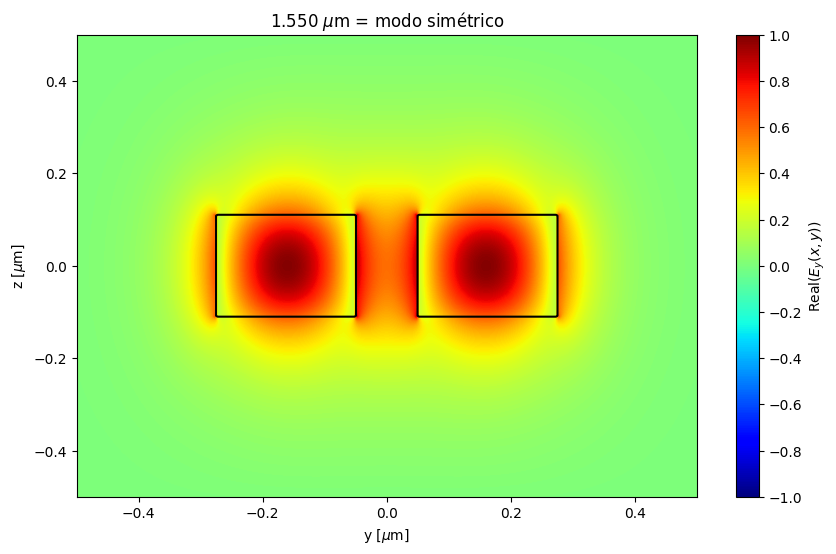

In [243]:
v = np.linspace(-1,1,1000, endpoint=True)

fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)
Z1,Y1 = np.meshgrid(-z_efielf1,-y_efielf1)
Zplot1,Yplot1 = (Z1, (Y1)/2)
plt.contour(Yplot1,Zplot1, rfindex1.real, 0, colors='k', origin='upper')
im = plt.contourf(Yplot1, Zplot1, efield1.real, v, cmap=plt.cm.jet, vmin=-1, vmax=1)

colorbar = plt.colorbar(im)
colorbar.set_label(r'Real($E_y(x,y)$)')
tick_locator = ticker.MaxNLocator(nbins=10)
colorbar.locator = tick_locator
colorbar.update_ticks()

plt.xlabel(r'y [$\mu$m]')
plt.ylabel(r'z [$\mu$m]')
plt.title(r'%4.3f $\mu$m = modo simétrico'%(wavelength/um))
plt.xlim([-0.5,0.5])
plt.ylim([-0.5,0.5])

plt.savefig('dc_mode_1.png')
plt.show()


Perfil de Campo Elétrico - Modo_2

In [198]:
efield2 = np.squeeze(modeApi.getresult('FDE::data::mode2', 'Ey'))
z_efielf2 = modeApi.getresult('FDE::data::mode2', 'z')/um
y_efielf2 = modeApi.getresult('FDE::data::mode2', 'y')/um

rfindex2 = np.squeeze(modeApi.getdata('FDE::data::material', 'index_z'))

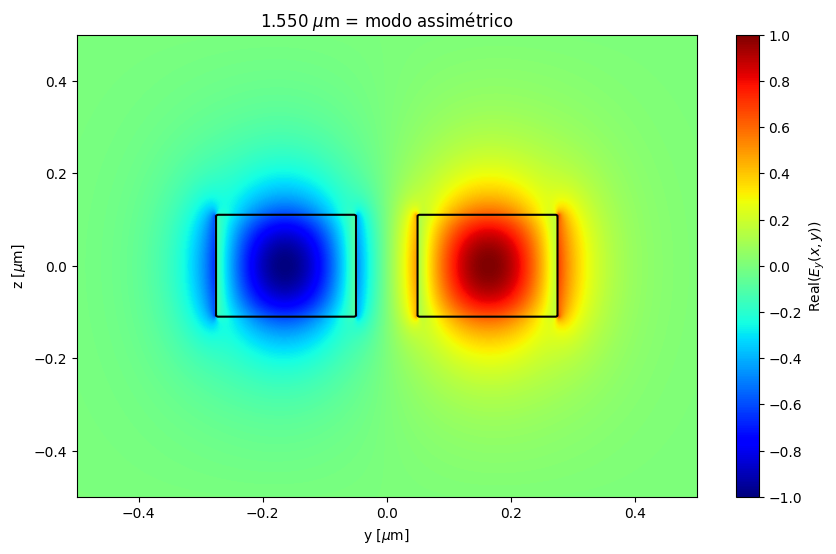

In [242]:
v = np.linspace(-1,1,1000, endpoint=True)

fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(111)
Z2,Y2 = np.meshgrid(-z_efielf2,-y_efielf2)
Zplot2,Yplot2 = (Z2, (Y2)/2)
plt.contour(Yplot2,Zplot2, rfindex2.real, 0, colors='k', origin='upper')
im = plt.contourf(Yplot2, Zplot2, efield2.real, v, cmap=plt.cm.jet, vmin=-1, vmax=1)

colorbar = plt.colorbar(im)
colorbar.set_label(r'Real($E_y(x,y)$)')
tick_locator = ticker.MaxNLocator(nbins=10)
colorbar.locator = tick_locator
colorbar.update_ticks()

plt.xlabel(r'y [$\mu$m]')
plt.ylabel(r'z [$\mu$m]')
plt.title(r'%4.3f $\mu$m = modo assimétrico'%(wavelength/um))
plt.xlim([-0.5,0.5])
plt.ylim([-0.5,0.5])

plt.savefig('dc_mode_2.png')
plt.show()



Perfil de Campo Elétrico - Modo_3

In [201]:
efield3 = np.squeeze(modeApi.getresult('FDE::data::mode3', 'Ey'))
z_efielf3 = modeApi.getresult('FDE::data::mode3', 'z')/um
y_efielf3 = modeApi.getresult('FDE::data::mode3', 'y')/um

rfindex3 = np.squeeze(modeApi.getdata('FDE::data::material', 'index_z'))

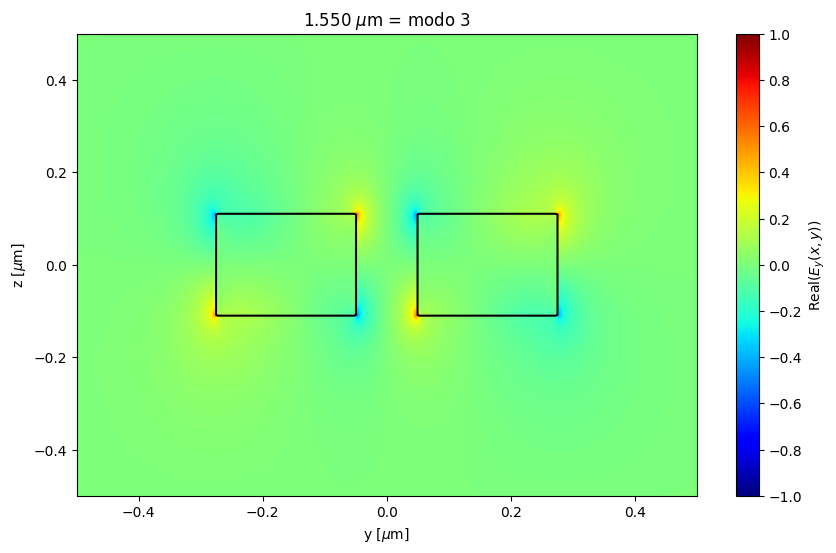

In [244]:
v = np.linspace(-1,1,1000, endpoint=True)

fig3 = plt.figure(figsize=(10,6))
ax3 = fig3.add_subplot(111)
Z3,Y3 = np.meshgrid(-z_efielf3,-y_efielf3)
Zplot3,Yplot3 = (Z3, (Y3)/2)
plt.contour(Yplot3,Zplot3, rfindex3.real, 0, colors='k', origin='upper')
im3 = plt.contourf(Yplot3, Zplot3, efield3.real, v, cmap=plt.cm.jet, vmin=-1, vmax=1)

colorbar = plt.colorbar(im3)
colorbar.set_label(r'Real($E_y(x,y)$)')
tick_locator = ticker.MaxNLocator(nbins=10)
colorbar.locator = tick_locator
colorbar.update_ticks()

plt.xlabel(r'y [$\mu$m]')
plt.ylabel(r'z [$\mu$m]')
plt.title(r'%4.3f $\mu$m = modo 3'%(wavelength/um))
plt.xlim([-0.5,0.5])
plt.ylim([-0.5,0.5])

plt.savefig('dc_mode_3.png')
plt.show()


Perfil de Campo Elétrico - Modo_4

In [212]:
efield4 = np.squeeze(modeApi.getresult('FDE::data::mode4', 'Ey'))
z_efielf4 = modeApi.getresult('FDE::data::mode3', 'z')/um
y_efielf4 = modeApi.getresult('FDE::data::mode3', 'y')/um

rfindex4 = np.squeeze(modeApi.getdata('FDE::data::material', 'index_z'))

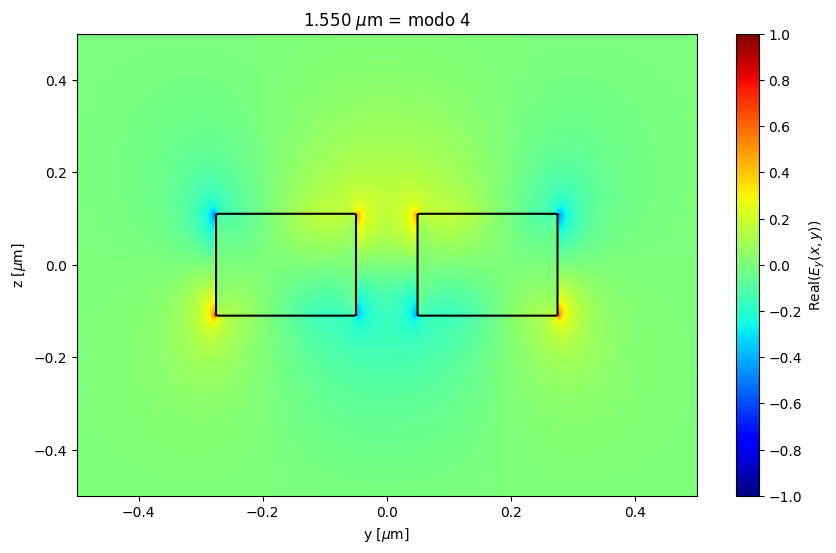

In [245]:
v = np.linspace(-1,1,1000, endpoint=True)

fig4 = plt.figure(figsize=(10,6))
ax4 = fig4.add_subplot(111)
Z4,Y4 = np.meshgrid(-z_efielf4,-y_efielf4)
Zplot4,Yplot4 = (Z4, (Y4)/2)
plt.contour(Yplot4,Zplot4, rfindex4.real, 0, colors='k', origin='upper')
im3 = plt.contourf(Yplot4, Zplot4, efield4.real, v, cmap=plt.cm.jet, vmin=-1, vmax=1)

colorbar = plt.colorbar(im3)
colorbar.set_label(r'Real($E_y(x,y)$)')
tick_locator = ticker.MaxNLocator(nbins=10)
colorbar.locator = tick_locator
colorbar.update_ticks()

plt.xlabel(r'y [$\mu$m]')
plt.ylabel(r'z [$\mu$m]')
plt.title(r'%4.3f $\mu$m = modo 4'%(wavelength/um))
plt.xlim([-0.5,0.5])
plt.ylim([-0.5,0.5])

plt.savefig('dc_mode_4.png')
plt.show()


modes 3 e 4 não serão necessários

Comprimento de Acoplamento

In [214]:
neff1 = modeApi.getresult('FDE::data::mode1', 'neff')
print(f'Indice Efetivo MODO_1: {neff1[0][0]}')
neff2 = modeApi.getresult('FDE::data::mode2', 'neff')
print(f'Indice Efetivo MODO_2: {neff2[0][0]}')

Lx = (wavelength/(2*np.abs(neff1[0].real - neff2[0].real)))/um
print(f'L_X = {Lx[0]:.4f} µm')

Indice Efetivo MODO_1: (2.3706555315831666+0.00035356502549238313j)
Indice Efetivo MODO_2: (2.3389472799500495+0.0002773796438699837j)
L_X = 24.4416 µm


Analise de Convergência do mesh

In [215]:
modes = 2
modeApi.switchtolayout()
modeApi.select('FDE')
modeApi.set('number of trial modes', modes)

In [217]:
modeApi.switchtolayout()
modeApi.select('mesh')
modeApi.set('enabled', 0)

mesh_cells_vector = np.linspace(50, 500, 50)
neff_modo1 = np.zeros(len(mesh_cells_vector), dtype=complex)
neff_modo2 = np.zeros(len(mesh_cells_vector), dtype=complex)

for i in range(len(mesh_cells_vector)):
    modeApi.switchtolayout()
    modeApi.select('FDE')
    modeApi.set('mesh cells z', mesh_cells_vector[i])
    modeApi.set('mesh cells y', mesh_cells_vector[i])
    modeApi.findmodes()
    neff_modo1[i] = modeApi.getresult('FDE::data::mode1', 'neff')
    neff_modo2[i] = modeApi.getresult('FDE::data::mode2', 'neff')

C:\Users\edilb\AppData\Local\Temp\ipykernel_17324\744500847.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  neff_modo1[i] = modeApi.getresult('FDE::data::mode1', 'neff')
C:\Users\edilb\AppData\Local\Temp\ipykernel_17324\744500847.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  neff_modo2[i] = modeApi.getresult('FDE::data::mode2', 'neff')


C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

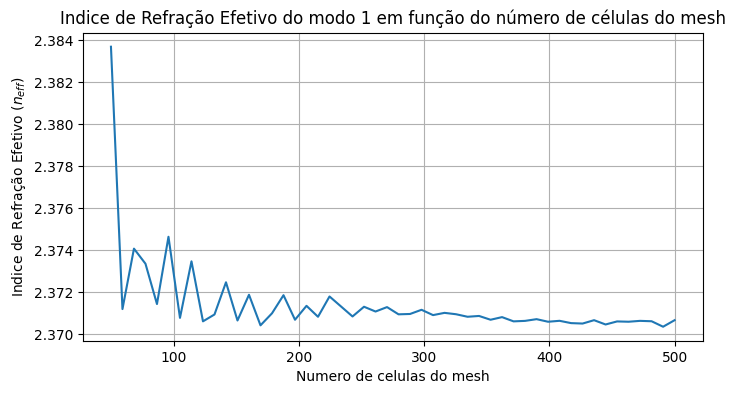

In [218]:
fig5 = plt.figure(figsize=(8,4))
plt.plot(mesh_cells_vector, neff_modo1)
plt.title('Indice de Refração Efetivo do modo 1 em função do número de células do mesh')
plt.xlabel('Numero de celulas do mesh')
plt.ylabel('Indice de Refração Efetivo ($n_{eff}$)')
plt.grid()

plt.savefig('Analise de Convergencia do FDE modo1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

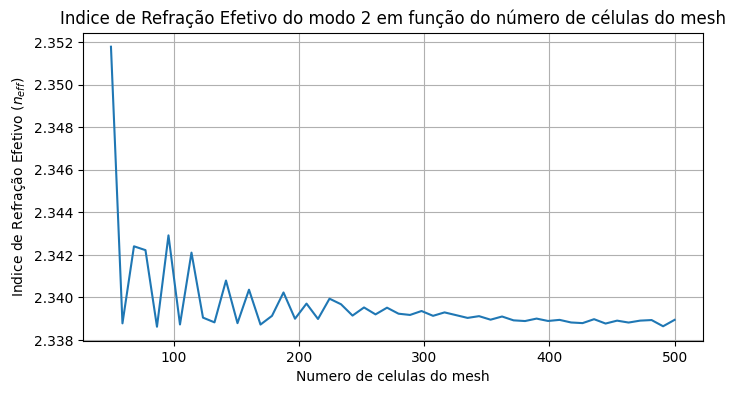

In [219]:
fig6 = plt.figure(figsize=(8,4))
plt.plot(mesh_cells_vector, neff_modo2)
plt.title('Indice de Refração Efetivo do modo 2 em função do número de células do mesh')
plt.xlabel('Numero de celulas do mesh')
plt.ylabel('Indice de Refração Efetivo ($n_{eff}$)')
plt.grid()

plt.savefig('Analise de Convergencia do FDE modo2')
plt.show

In [221]:
modeApi.switchtolayout()
modeApi.select('FDE')
modeApi.set('mesh cells z', mesh_cells)
modeApi.set('mesh cells y', mesh_cells)
modeApi.select('mesh')
modeApi.set('enabled', 1)

Comprimento de acoplamento em função da distância entre guias

In [222]:
gap_vector = np.linspace(0*nm, 500*nm, 20)
delta_n = np.zeros(len(gap_vector))

for j in range(len(gap_vector)):
    modeApi.switchtolayout()
    modeApi.select('waveguide_upper')
    modeApi.set('y', (gap_vector[j] + y_span_waveguide)/2)
    modeApi.select('90_bend_left')
    modeApi.set('y', (radiu+(gap_vector[j] + y_span_waveguide)/2))
    modeApi.select('90_bend_rigth')
    modeApi.set('y', (radiu+(gap_vector[j] + y_span_waveguide)/2))
    modeApi.select('waveguide_topper')
    modeApi.set('y', -(gap_vector[j] + y_span_waveguide)/2)
    modeApi.findmodes()
    n1 = modeApi.getresult('FDE::data::mode1', 'neff')
    n2 = modeApi.getresult('FDE::data::mode2', 'neff')
    delta_n[j] = np.abs(n1.real - n2.real)
    
    

C:\Users\edilb\AppData\Local\Temp\ipykernel_17324\490976215.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_n[j] = np.abs(n1.real - n2.real)


<function matplotlib.pyplot.show(close=None, block=None)>

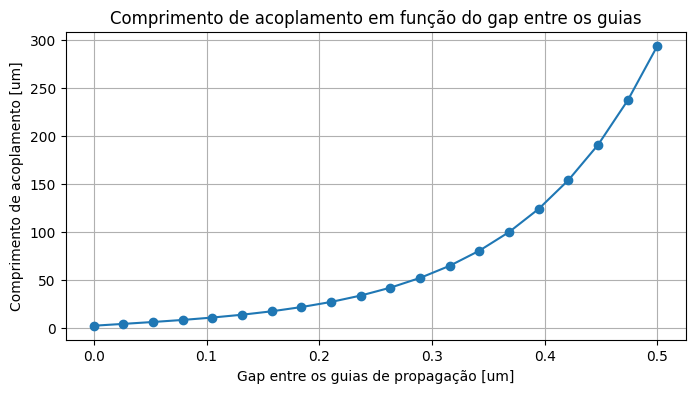

In [224]:
Lx_vector = wavelength/(2*delta_n)
fig7 = plt.figure(figsize=(8,4))
plt.plot(gap_vector/um, Lx_vector/um, 'o-')
plt.title('Comprimento de acoplamento em função do gap entre os guias')
plt.xlabel('Gap entre os guias de propagação [um]')
plt.ylabel('Comprimento de acoplamento [um]')
plt.grid()

plt.savefig('Comprimento de acoplamento')
plt.show

Acoplamento de potência em função do comprimento do dispositivo

In [237]:
L = np.linspace(0, 50*nm, 100)

k2 = np.squeeze((np.sin(np.pi/2 * L/Lx /nm)**2))
t2 = np.squeeze((np.cos(np.pi/2 * L/Lx /nm)**2))

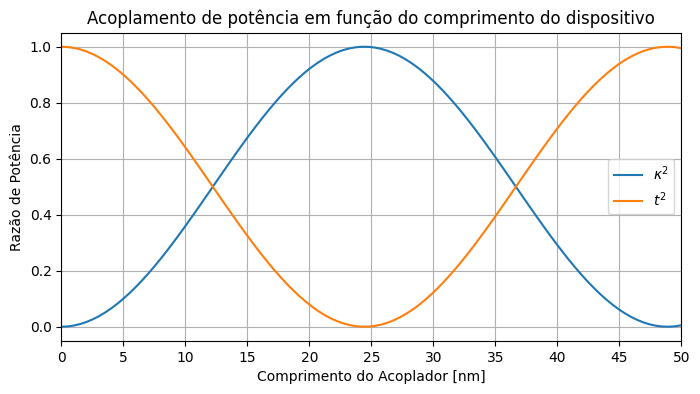

In [238]:
fig8 = plt.figure(figsize=(8,4))
plt.plot(L/nm, k2, label=r'$\kappa^2$')
plt.plot(L/nm, t2, label=r'$t^2$')
plt.legend()
plt.title('Acoplamento de potência em função do comprimento do dispositivo')
plt.xlabel('Comprimento do Acoplador [nm]')
plt.ylabel('Razão de Potência')
plt.xticks(range(0,55, 5))
plt.xlim([0,50])
plt.grid()

plt.savefig('Razão de Potência')
plt.show()

In [239]:
def L_relacao(x,y):
    L = (2 / np.pi) * y * np.arcsin(np.sqrt(x))
    return L

#50/50
L_50_50 = L_relacao(0.5,Lx)
#95/5
L_95_5 = L_relacao(0.95,Lx)
#99/1
L_99_1 = L_relacao(0.99,Lx)

print(f'L_50/50 = {L_50_50[0]:.4f} µm')
print(f'L_95/05 = {L_95_5[0]:.4f} µm')
print(f'L_99/01 = {L_99_1[0]:.4f} µm')

L_50/50 = 12.2208 µm
L_95/5 = 20.9326 µm
L_99/1 = 22.8830 µm
